In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Taske One Basic Data Exploration

In [3]:
# number of rows 
rows = df.shape[0]
print(f"number of rows :{rows}" )

#number of columns
col = df.shape[1]
print(f"number of rows :{col}" )

# data types 
type= df.dtypes
print(f" data types: {type}")

#missing values
missing = df.isnull().sum()
print(f" missing values:{missing}")


number of rows :148654
number of rows :13
 data types: Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
 missing values:Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


Task two Descriptive Statistics: 

In [6]:
sta = df['TotalPay'].describe()
print (f"descriptive statisttics summary: {sta}")
range = df['TotalPay'].max() - df['TotalPay'].min()
print (f" range: {range}")
median = df['TotalPay'].median()
print (f"median: {median}")



descriptive statisttics summary: count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
 range: 568213.56
median: 71426.60999999999


Data Cleaning

In [9]:
''' i calculate the mean for the BasePay and Benefits to fill the missing data with them so it will not efict on the analysis result 
'''
basepay = df['BasePay'].mean()
benefits = df['Benefits'].mean()
df.loc[:, 'BasePay'].fillna(basepay, inplace=True)
df.loc[:,'Benefits'].fillna(benefits, inplace=True)

Basic Data Visualization

In [16]:
import matplotlib.pyplot as plt


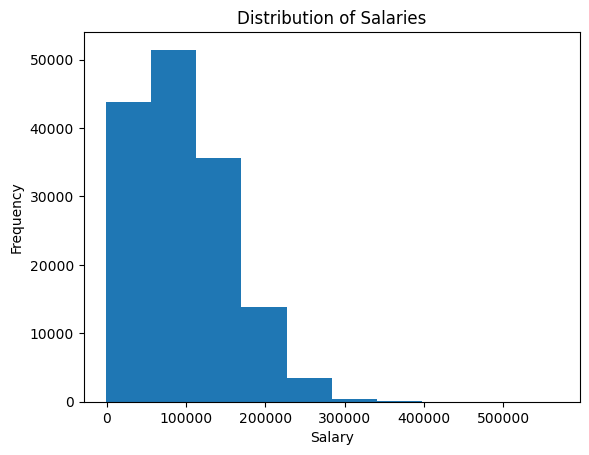

In [17]:
plt.hist(df['TotalPayBenefits'], bins=10)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

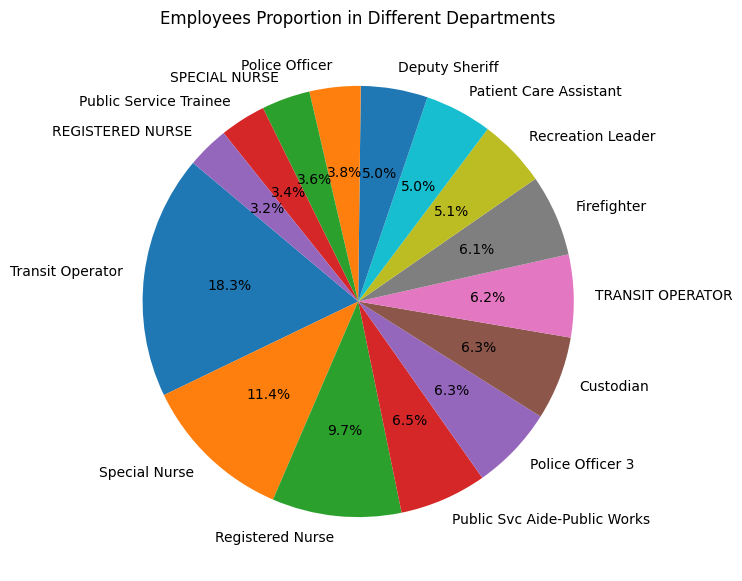

In [21]:
department_counts = df['JobTitle'].value_counts().head(15)
plt.figure(figsize=(7, 7))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Employees Proportion in Different Departments')
plt.show()
     

Grouped Analysis

In [28]:
'i select the JobTitle and Year to get the avrage annual salary for each job'
avrage_annual_salary= df.groupby (['JobTitle', 'Year'])['TotalPay'].mean()
avrage_annual_salary= round(avrage_annual_salary, 1)
print (f"the avrage annual salary for each job { avrage_annual_salary}")

the avrage annual salary for each job JobTitle                                        Year
ACCOUNT CLERK                                   2011    44035.7
ACCOUNTANT                                      2011    47429.3
ACCOUNTANT INTERN                               2011    29031.7
ACPO,JuvP, Juv Prob (SFERS)                     2014    62290.8
ACUPUNCTURIST                                   2011    67594.4
                                                         ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  2011    53632.9
Youth Comm Advisor                              2012    57544.7
                                                2013    35823.3
                                                2014    36465.9
ZOO CURATOR                                     2011    66686.6
Name: TotalPay, Length: 4137, dtype: float64


In [29]:
avrage_salary_in_agancy= df.groupby (['JobTitle', 'Agency'])['TotalPay'].mean()
avrage_salary_in_agancy= round(avrage_salary_in_agancy, 1)
print (f"the avrage annual salary for each job { avrage_salary_in_agancy}")

the avrage annual salary for each job JobTitle                                        Agency       
ACCOUNT CLERK                                   San Francisco    44035.7
ACCOUNTANT                                      San Francisco    47429.3
ACCOUNTANT INTERN                               San Francisco    29031.7
ACPO,JuvP, Juv Prob (SFERS)                     San Francisco    62290.8
ACUPUNCTURIST                                   San Francisco    67594.4
                                                                  ...   
X-RAY LABORATORY AIDE                           San Francisco    52705.9
X-Ray Laboratory Aide                           San Francisco    50823.9
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  San Francisco    53632.9
Youth Comm Advisor                              San Francisco    41414.3
ZOO CURATOR                                     San Francisco    66686.6
Name: TotalPay, Length: 2159, dtype: float64


Simple Correlation Analysis

Correlation between total salary and Over time Pay: 0.46798132797939385


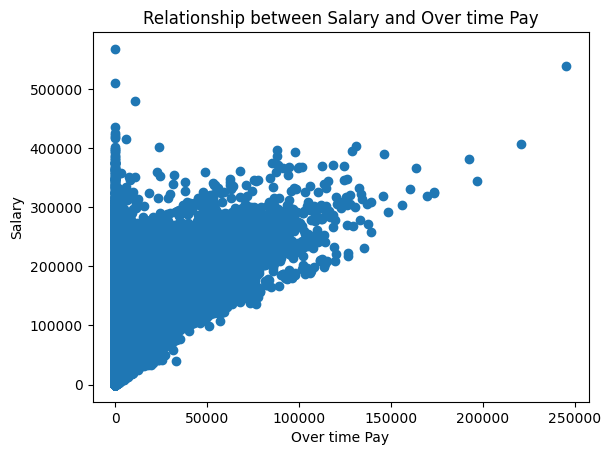

In [31]:
correlation = df['TotalPayBenefits'].corr(df['OvertimePay'])
print("Correlation between total salary and Over time Pay:", correlation)

plt.scatter(df['OvertimePay'], df['TotalPayBenefits'])
plt.xlabel('Over time Pay')
plt.ylabel('Salary')
plt.title('Relationship between Salary and Over time Pay')
plt.show()

Summary of Insights

With in 148654 rows and 13 columns dataset and after preliminary analysis of the data, I concluded:
* Highest salary : 567595.43$
* Minimum salary : 5.56$
* Range of Salaries : 567589.87$
* Average Salary: 75541.64

* from this we gan obtain suggests a significant variability in salaries, indicating that there are employees with salaries much higher or lower than the average.

* I Found weak positive corelaton between 'TotalPay' and 'OverTimePay' wich is mean ther is no high effect on the total salary and the over time work 
* Average salaries vary according to job titles during different years. This shows the types of jobs that are most in demand and highest paid.